In [2]:
import glob
import numpy as np
import cv2
IMG_SIZE = 227
def load_dataset(path):
    X = np.array([])
    y = np.array([])
    classes = ['NORMAL', 'PNEUMONIA']
    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        for f in files:
            print(f)
            img = cv2.imread(f)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if X.size == 0:
                X = np.array([img])
            else:
                X = np.vstack([X,[img]])
            y = np.append(y, c)
    assert(X.size > 0), 'Cannot read file'
    return (X,y)

In [3]:
X_train, y_train = load_dataset("/content/drive/MyDrive/archive/chest_xray/train/")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0718-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0713-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0716-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0721-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0730-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0701-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0711-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0712-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0719-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0732-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0740-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0710-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/train/NORMAL/IM-0706-0001

In [4]:
X_test, y_test = load_dataset("/content/drive/MyDrive/archive/chest_xray/test/")

/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0007-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0001-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0009-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0016-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0003-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0021-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0013-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0017-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0015-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0005-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/IM-0006-0001.jpeg
/content/drive/MyDrive/archive/chest_xray/test/NORMAL/

Text(0.5, 1.0, 'Ảnh test thứ 0')

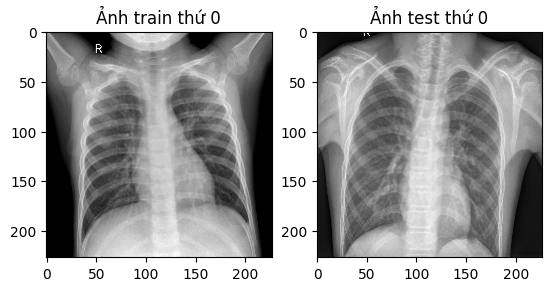

In [5]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('Ảnh train thứ 0')

plt.subplot(1, 2, 2)
plt.imshow(X_test[0])
plt.title('Ảnh test thứ 0')

In [6]:
X_train.shape

(5216, 227, 227, 3)

In [7]:
X_test.shape

(624, 227, 227, 3)

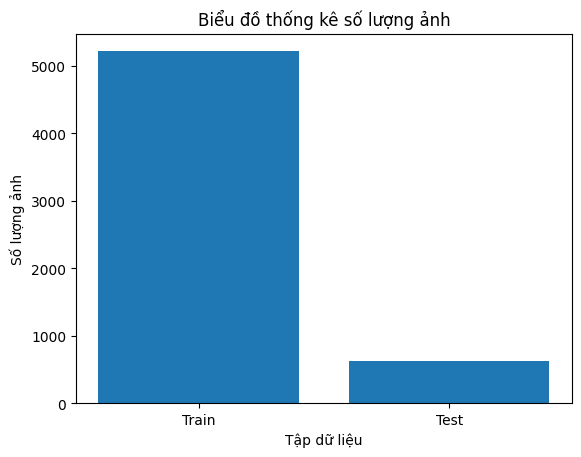

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(['Train', 'Test'], [len(X_train), len(X_test)])
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng ảnh')
plt.title('Biểu đồ thống kê số lượng ảnh')
plt.show()

Bài tập 2

In [9]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [11]:
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [12]:
X_train_reshaped = X_train.reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE*3)
X_test_reshaped = X_test.reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE*3)

In [13]:
lrc.fit(X_train_reshaped, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred_lrc = lrc.predict(X_test_reshaped)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
accuracy_score(y_test_encoded, y_pred_lrc)

0.7419871794871795

In [17]:
precision_score(y_test_encoded, y_pred_lrc)*100

71.24304267161409

In [18]:
recall_score(y_test_encoded, y_pred_lrc)*100

98.46153846153847

In [19]:
f1_score(y_test_encoded, y_pred_lrc, average='macro')*100

66.09965885048473

Bài tập 3

Đặc trung HOG

In [20]:
from skimage.feature import hog

def feature_hog(img):
    fd, hog_img = hog(img, orientations=9, pixels_per_cell=(11,11),\
                      cells_per_block=(2,2), visualize=True, channel_axis=-1)
    return hog_img

In [22]:
X_train_hog = np.array([feature_hog(k) for k in X_train]).reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE)

In [23]:
X_test_hog = np.array([feature_hog(k) for k in X_test]).reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE)

Text(0.5, 1.0, 'Ảnh train thứ 0 rút trích hog')

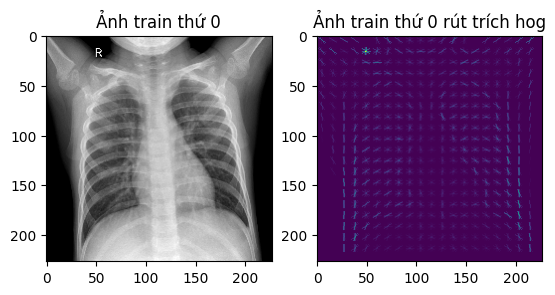

In [25]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('Ảnh train thứ 0')

plt.subplot(1, 2, 2)
plt.imshow(feature_hog(X_train[0]))
plt.title('Ảnh train thứ 0 rút trích hog')

In [26]:
from sklearn import svm
svc_hog = svm.SVC(kernel='linear')

In [29]:
svc_hog.fit(X_train_hog, y_train_encoded)

SVC(kernel='linear')

In [30]:
y_pred_svc_hog = svc_hog.predict(X_test_hog)

In [31]:
accuracy_score(y_test_encoded, y_pred_svc_hog)*100

74.51923076923077

In [32]:
precision_score(y_test_encoded, y_pred_svc_hog)*100

71.11517367458866

In [33]:
recall_score(y_test_encoded, y_pred_svc_hog)*100

99.74358974358975

In [34]:
f1_score(y_test_encoded, y_pred_svc_hog, average='macro')*100

65.95277395532707

Đặc trưng CANNY

In [35]:
from skimage.feature import canny

In [36]:
X_train_canny = np.array([canny(k[:,:,0]) for k in X_train]).reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE)

In [37]:
X_test_canny = np.array([canny(k[:,:,0]) for k in X_test]).reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE)

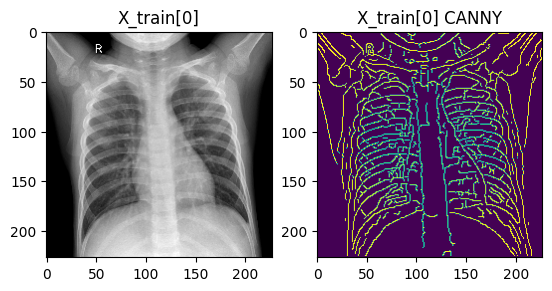

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')
plt.subplot(1, 2, 2)
plt.imshow(canny(X_train[0][:,:,0]))
plt.title('X_train[0] CANNY')
plt.show()

In [39]:
from sklearn import svm
svc_canny = svm.SVC(kernel='linear')

In [40]:
svc_canny.fit(X_train_canny, y_train_encoded)

SVC(kernel='linear')

In [41]:
y_pred_svc_canny = svc_canny.predict(X_test_canny)

In [42]:

accuracy_score(y_test_encoded, y_pred_svc_canny)*100

74.03846153846155

In [43]:
precision_score(y_test_encoded, y_pred_svc_canny)*100

72.265625

In [44]:
recall_score(y_test_encoded, y_pred_svc_canny)*100

94.87179487179486

In [45]:
f1_score(y_test_encoded, y_pred_svc_canny, average='macro')*100

67.60955102982453

Đặc trưng FAST

In [46]:
from skimage.feature import corner_fast
def feature_fast(img):
    fast_image = corner_fast(img, n=8, threshold=0)

    return fast_image

In [48]:
X_train_fast = np.array([feature_fast(k[:,:,0]) for k in X_train]).reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE)

In [49]:
X_test_fast = np.array([feature_fast(k[:,:,0]) for k in X_test]).reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE)

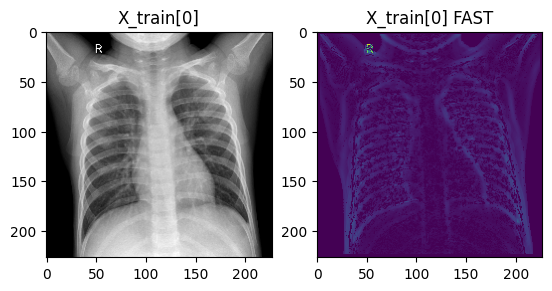

In [50]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')
plt.subplot(1, 2, 2)
plt.imshow(feature_fast(X_train[0][:,:,0]))
plt.title('X_train[0] FAST')
plt.show()

In [51]:
from sklearn import svm
svc_fast = svm.SVC(kernel='linear')

In [52]:
svc_fast.fit(X_train_fast, y_train_encoded)

SVC(kernel='linear')

In [53]:
y_pred_svc_fast = svc_fast.predict(X_test_fast)

In [54]:
accuracy_score(y_test_encoded, y_pred_svc_fast)*100

75.32051282051282

In [55]:
precision_score(y_test_encoded, y_pred_svc_fast)*100

71.93308550185874

In [56]:
recall_score(y_test_encoded, y_pred_svc_fast)*100

99.23076923076923

In [57]:
f1_score(y_test_encoded, y_pred_svc_fast, average='macro')*100

67.64008620689656

Lab 5

1. ĐỌC VÀ TÌM HIỂU CẤU TRÚC CỦA DỮ LIỆU

In [58]:
from sklearn.datasets import load_iris
iris = load_iris()

In [59]:
X = iris.data[:, :2]
y = iris.target

In [60]:

X.shape

(150, 2)

In [61]:
y.shape

(150,)

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

2. PHÂN CHIA DỮ LIỆU

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
X_train.shape

(120, 2)

In [65]:
X_test.shape

(30, 2)

In [66]:
y_train.shape

(120,)

In [67]:
y_test.shape

(30,)

3. HUẤN LUYỆN MÔ HÌNH VÀ DỰ ĐOÁN


In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

In [71]:
y_pred

array([2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 1, 2, 0])

4. ĐÁNH GIÁ KHẢ NĂNG DỰ ĐOÁN CỦA MÔ HÌNH

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

90.0

5. BÀI TẬP

Bài tập 1. Thống kê số lượng nhãn (label) trên tập training và tập test vừa chia. Vẽ biểu đồ phân bố nhãn (Gợi ý: sử dụng barplot trong thư viện seaborn).


In [73]:
y_train

array([2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 0, 2, 1, 1, 0, 1, 2])

In [74]:
y_test

array([2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 2, 2, 0])

In [75]:
import numpy as np
import matplotlib.pyplot as plt

num_classes = 3
train_label_counts = np.bincount(y_train, minlength=num_classes)
test_label_counts = np.bincount(y_test, minlength=num_classes)

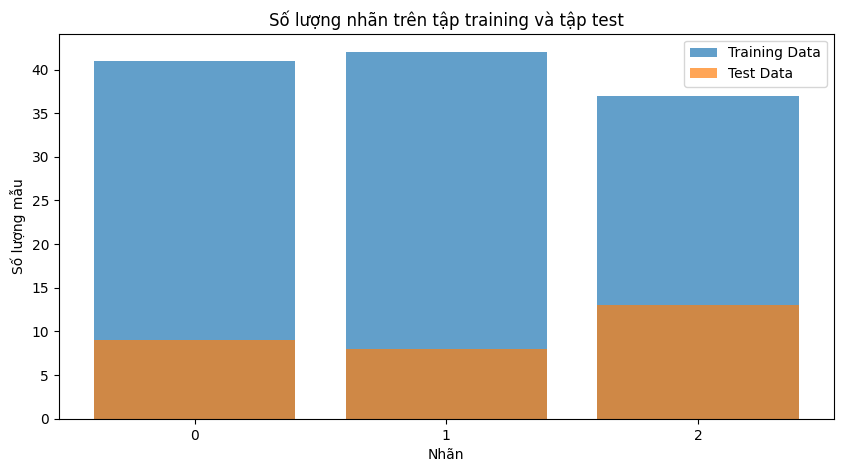

In [76]:
plt.figure(figsize=(10, 5))
plt.bar(range(num_classes), train_label_counts, label='Training Data', alpha=0.7)
plt.bar(range(num_classes), test_label_counts, label='Test Data', alpha=0.7)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.legend()
plt.xticks(range(num_classes))
plt.title('Số lượng nhãn trên tập training và tập test')
plt.show()

Bài tập 2

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knc = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

In [79]:
knc.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [80]:
y_pred_knn = knc.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred_knn)

0.6666666666666666

In [82]:
from sklearn.svm import SVC

In [83]:
svc = SVC(kernel='linear', gamma='auto')

In [84]:
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [85]:
y_pred_svm = svc.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred_svm)

0.7666666666666667

Bài tập 4

In [87]:
lrc = LogisticRegression()

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'C':np.logspace(-10,10,100), 'penalty':['l1','l2']}

In [90]:
lrc_cv = GridSearchCV(lrc, param_grid, cv=10)

In [91]:
lrc_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [92]:
lrc_cv.best_params_

{'C': 3.1992671377973845, 'penalty': 'l2'}

In [93]:
lrc_cv.best_score_

0.7916666666666667